## Capstone Project 1 - Exploratory Data Analysis

#### The Main Question: Is there a relationship between audio features of songs and their popularity in the dataset?

In this notebook we try to answer the following questions using hypothesis testing and confidence intervals:  

- Is there a significant correlation between popularity and Loudness(both numerical variables - Correlation test performed) 
- Is there a significant correlation between popularity and Danceability(both numerical variables - Correlation test performed) 
- Is there a significant correlation between Popularity and Instrumentallness(both numerical variables - Correlation test performed) 
- Is there a significant correlation between popularity and track duration?(both numerical variables - Correlation test performed) 
- Is there a significant correlation between popularity and Liveness?(both numerical variables - Correlation test performed) 
- Does 4-beat time signature make a song more popular?(one categorical, the other numerical variable - two sample test performed)

From our data storytelling (previous notebook), we know that there is correlation between some of the independent variables (e.g. loudness and energy). But most of these correlations are obvious (i.e. given by definition) and are not of particular interest for hypothesis testing here.

In [51]:
## Import the relevant modules
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division

In [6]:
## Read in the data
data = pd.read_csv('SpotifyAudioFeaturesNov2018_wrangled.csv')
data.head()

,Unnamed: 0,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,44
1,1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,10
2,2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,63
3,3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,9
4,4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,8


### Popularity and Loudness:

In [109]:
sns.set()

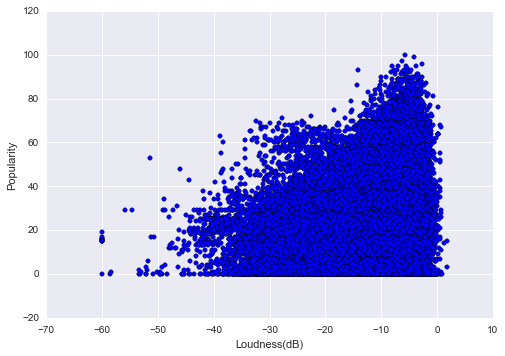

In [14]:
## Scatter plot of popularity vs loudness
plt.scatter(x='loudness', y='popularity', data=data)
plt.xlabel('Loudness(dB)')
plt.ylabel('Popularity')
plt.show()

In [18]:
## Defining a function that caculates pearson correlation coefficient
def pearson_r(var1,var2):
    """Compute the Pearson correlation coefficient between two variables"""
    r = (np.cov(var1,var2)[0,1])/(np.std(var1)*np.std(var2))
    return r

In [107]:
## Observed correlation value 
r_pl_obs = pearson_r(data.loudness,data.popularity)
r_pl_obs

0.23507380032993988

** H0: ** There is no correlation between loudness and popularity  
** Ha: ** There is positive correlation between loudness and popularity (Positive because having seen the scatter plot, testing for positive correlation seems appropriate)  
$\alpha$ = 0.05

In [52]:
## Testing the hypothesis using bootstrap method

# Initialize an empty array to hold bootstrap replicates
perm_replicates = np.empty(1000)

# Perform permutation test and draw bootstrap replicates
for i in range(1000):
    # Permute x
    loudness_permuted = np.random.permutation(data.loudness)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(loudness_permuted,data.popularity)

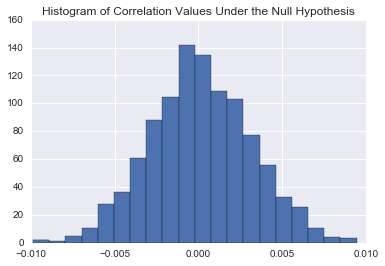

In [53]:
plt.hist(perm_replicates, bins=20,normed=True)
plt.title('Histogram of Correlation Values Under the Null Hypothesis')
plt.show()

In [54]:
# Compute p-value: p
p = np.sum(perm_replicates >= r_pl_obs)/len(perm_replicates)
print('p-val =', p)

('p-val =', 0.0)


** Conclusion: ** P_value is small. We conclude that there is a positive correlation between popularity and loudness.

### Popularity and Danceability:

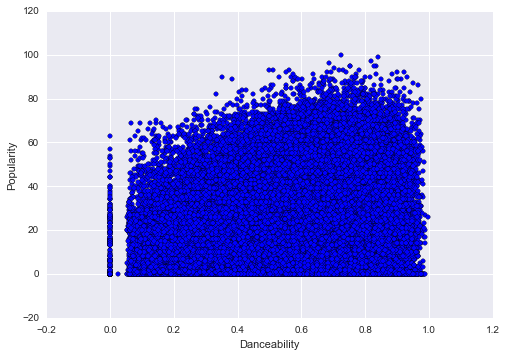

In [110]:
## Scatter plot of popularity vs danceability
plt.scatter(x='danceability', y='popularity', data=data)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

In [111]:
## Observed correlation value 
r_pd_obs = pearson_r(data.danceability,data.popularity)
r_pd_obs

0.13389690614019009

** H0: ** There is no correlation between danceability and popularity  
** Ha: ** There is positive correlation between danceability and popularity (Positive because having seen the scatter plot, testing for positive correlation seems appropriate)  
$\alpha$ = 0.05

In [112]:
## Testing the hypothesis using bootstrap method

# Initialize an empty array to hold bootstrap replicates
perm_replicates = np.empty(1000)

# Perform permutation test and draw bootstrap replicates
for i in range(1000):
    # Permute x
    danceability_permuted = np.random.permutation(data.danceability)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(danceability_permuted,data.popularity)

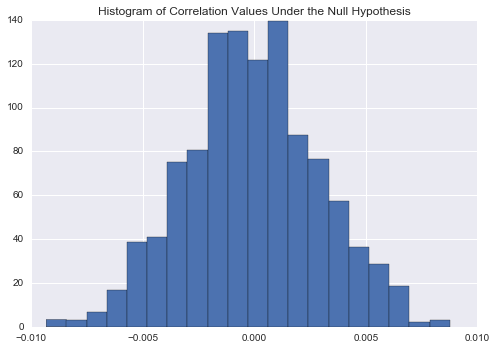

In [113]:
plt.hist(perm_replicates, bins=20,normed=True)
plt.title('Histogram of Correlation Values Under the Null Hypothesis')
plt.show()

In [56]:
# Compute p-value: p
p = np.sum(perm_replicates >= r_pd_obs)/len(perm_replicates)
print('p-val =', p)

('p-val =', 0.0)


** Conclusion: ** P_value is small. We conclude that there is a positive correlation between popularity and danceability.

### Popularity and Instrumentalness:

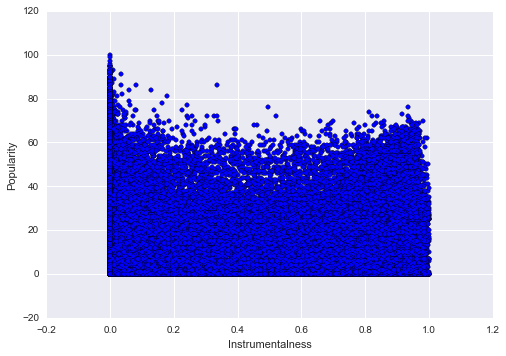

In [41]:
## Scatter plot of popularity vs danceability
plt.scatter(x='instrumentalness', y='popularity', data=data)
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')
plt.show()

In [42]:
## Observed correlation value 
r_pi_obs = pearson_r(data.instrumentalness,data.popularity)
r_pi_obs

-0.21023519673633076

** H0: ** There is no correlation between instrumentalness and popularity  
** Ha: ** There is negative correlation between instrumentalness and popularity (negative because having seen the scatter plot, testing for negative correlation seems appropriate)  
$\alpha$ = 0.05

In [114]:
## Testing the hypothesis using bootstrap method

# Initialize an empty array to hold bootstrap replicates
perm_replicates = np.empty(1000)

# Perform permutation test and draw bootstrap replicates
for i in range(1000):
    # Permute x
    instrumentalness_permuted = np.random.permutation(data.instrumentalness)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(instrumentalness_permuted,data.popularity)

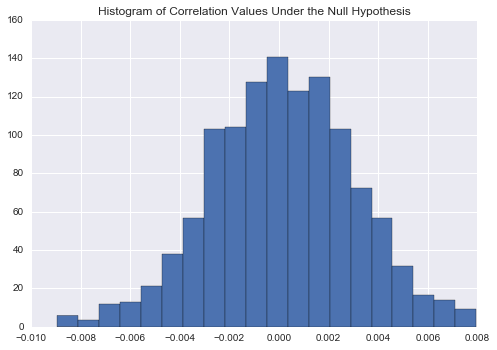

In [115]:
plt.hist(perm_replicates, bins=20,normed=True)
plt.title('Histogram of Correlation Values Under the Null Hypothesis')
plt.show()

In [58]:
# Compute p-value: p
p = np.sum(perm_replicates <= r_pi_obs)/len(perm_replicates)
print('p-val =', p)

('p-val =', 0.0)


** Conclusion:** P_value is small. We conclude that there is a negative correlation between popularity and instrumentalness.

### Popularity and Track Duration:

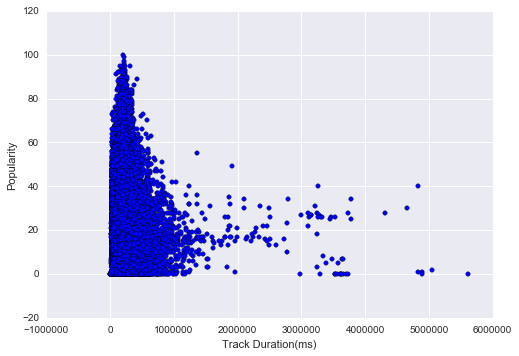

In [45]:
## Scatter plot of popularity vs Track Duration
plt.scatter(x='duration_ms', y='popularity', data=data)
plt.xlabel('Track Duration(ms)')
plt.ylabel('Popularity')
plt.show()

In [46]:
## Observed correlation value 
r_ptd_obs = pearson_r(data.duration_ms,data.popularity)
r_ptd_obs

-0.0094494360696917353

** H0: ** There is no correlation between track duration and popularity  
** Ha: ** There is negative correlation between track duration and popularity (negative because having seen the scatter plot, testing for negative correlation seems appropriate)  
$\alpha$ = 0.05

In [116]:
## Testing the hypothesis using bootstrap method

# Initialize an empty array to hold bootstrap replicates
perm_replicates = np.empty(1000)

# Perform permutation test and draw bootstrap replicates
for i in range(1000):
    # Permute x
    duration_ms_permuted = np.random.permutation(data.duration_ms)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(duration_ms_permuted,data.popularity)

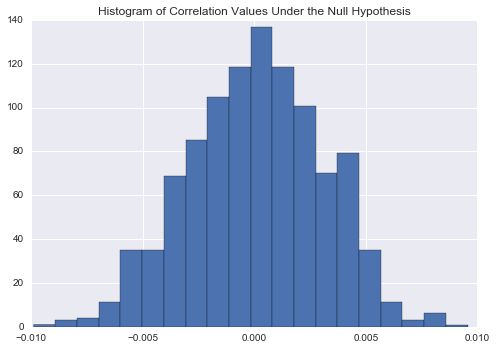

In [117]:
plt.hist(perm_replicates, bins=20,normed=True)
plt.title('Histogram of Correlation Values Under the Null Hypothesis')
plt.show()

In [118]:
# Compute p-value: p
p = np.sum(perm_replicates <= r_ptd_obs)/len(perm_replicates)
print('p-val =', p)

('p-val =', 0.001)


** Conclusion:** P_value is small. We conclude that there is a negative correlation between popularity and track duration.

### Popularity and Liveness:

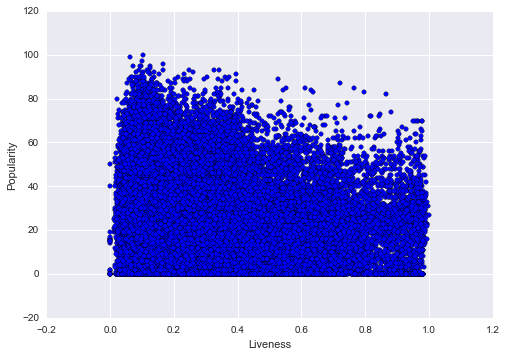

In [121]:
## Scatter plot of popularity vs Liveliness
plt.scatter(x='liveness', y='popularity', data=data)
plt.xlabel('Liveness')
plt.ylabel('Popularity')
plt.show()

In [122]:
## Observed correlation value 
r_pli_obs = pearson_r(data.liveness,data.popularity)
r_pli_obs

-0.027685943325141762

** H0: ** There is no correlation between liveness and popularity  
** Ha: ** There is negative correlation between liveness and popularity (negative because having seen the scatter plot, testing for negative correlation seems appropriate)  
$\alpha$ = 0.05

In [123]:
## Testing the hypothesis using bootstrap method

# Initialize an empty array to hold bootstrap replicates
perm_replicates = np.empty(1000)

# Perform permutation test and draw bootstrap replicates
for i in range(1000):
    # Permute x
    liveness_permuted = np.random.permutation(data.liveness)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(liveness_permuted,data.popularity)

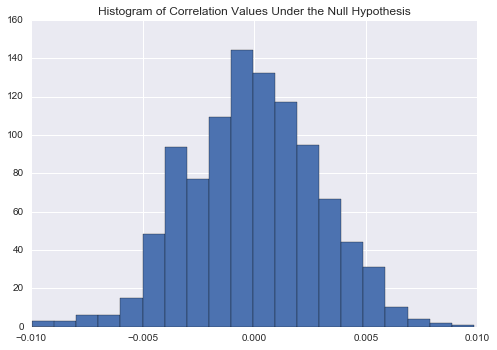

In [124]:
plt.hist(perm_replicates, bins=20,normed=True)
plt.title('Histogram of Correlation Values Under the Null Hypothesis')
plt.show()

In [125]:
# Compute p-value: p
p = np.sum(perm_replicates <= r_pli_obs)/len(perm_replicates)
print('p-val =', p)

('p-val =', 0.0)


** Conclusion:** P_value is small. So we reject the null and conclude that there is a negative correlation between popularity and liveness.

### Does 4-beat time signature make a song more popular?

In [81]:
## Defining a new binary variable for time signature
data.loc[(data.time_signature==4),'time_signature2']='4'
data.loc[(data.time_signature != 4),'time_signature2']='other'

In [80]:
data.time_signature2.value_counts()

4        100644
other     15728
Name: time_signature2, dtype: int64

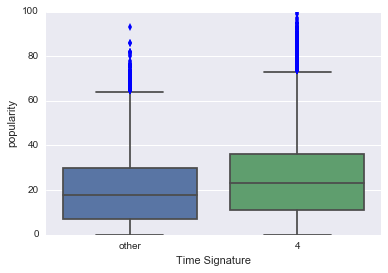

In [106]:
## Visual inspection
sns.boxplot(x="time_signature2", y="popularity", data=data,order=['other','4'])
plt.xlabel('Time Signature')
plt.show()

In [82]:
## Putting 4 and other popularity values in two separate numpy arrays
four=np.array(data.loc[data.time_signature2=='4'].popularity)
other=np.array(data.loc[data.time_signature2=='other'].popularity)

In [87]:
## Observed difference between sample means
obs_diff = np.mean(four) - np.mean(other)
obs_diff

4.5630001740975281

**H0:** There is no difference in popularity bewteen tracks with 4-beat time signature and other time signatures  
**Ha:** Tracks with 4-beat time signature are, on average, more popular than other time signatures  
$\alpha$ = 0.05

In [89]:
## Mean of all observations in the sample
sample_mean_all = np.mean(data.popularity)
sample_mean_all

24.23508232220809

In [91]:
## Shifting each group so that their sample means falls on the overall sample mean
four_shifted = four - np.mean(four) + sample_mean_all
other_shifted = other - np.mean(other) + sample_mean_all

In [96]:
## Defining a function that calculates a statistic from a bootstrap replicate
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [94]:
## Initializing empty arrays of length 1000 to hold the bootstrap sample means
bs_four_replicates=np.empty(1000)
bs_other_replicates=np.empty(1000)
bs_replicates_diff=np.empty(1000)

In [97]:
## Bootstrap sampling and putting the differences of sample means in a numpy array
for i in range(1000):
    bs_four_replicates[i]=bootstrap_replicate_1d(four_shifted, np.mean)
    bs_other_replicates[i]=bootstrap_replicate_1d(other_shifted, np.mean)
    bs_replicates_diff[i]=bs_four_replicates[i] - bs_other_replicates[i]

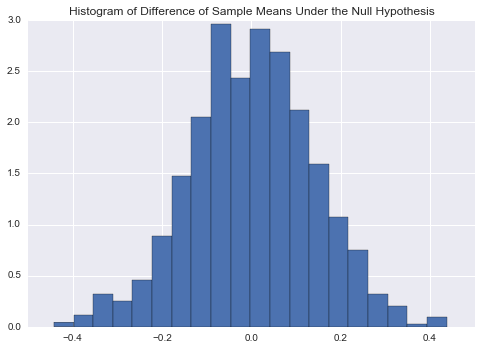

In [126]:
plt.hist(bs_replicates_diff, bins=20,normed=True)
plt.title('Histogram of Difference of Sample Means Under the Null Hypothesis')
plt.show()

In [100]:
## Computing the p_value
p_value=np.sum(bs_replicates_diff >= obs_diff)/len(bs_replicates_diff)
p_value

0.0

** Conclusion: ** Given the small p_value, we reject the null and conclude that 4-beat time signatures, on average, are more popular than other time signatures